In [ ]:
import tensorflow as tf


#creating data

In [ ]:
from sklearn.datasets import make_circles

x,y=make_circles(n_samples=1000,noise=0.03,random_state=42)


#visualize data

In [ ]:
import pandas as pd
circles=pd.DataFrame({"x0":x[:,0],"x1":x[:,1],"label":y})
circles


,x0,x1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
...,...,...,...
995,0.244054,0.944125,0
996,-0.978655,-0.272373,0
997,-0.136900,-0.810012,1
998,0.670362,-0.767502,0


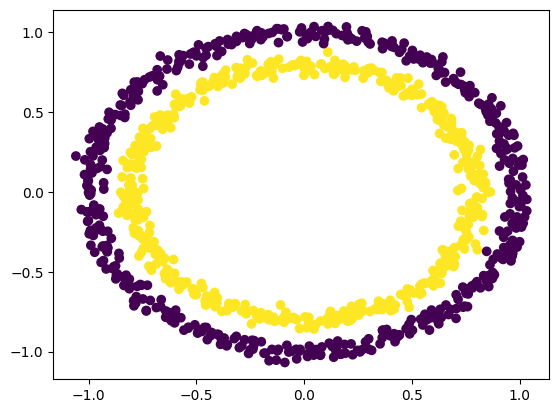

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(x[:,0],x[:,1],c=y,cmap="viridis")
plt.show()

In [ ]:
x.shape,y.shape

((1000, 2), (1000,))

In [ ]:
tf.random.set_seed(42)
model=tf.keras.models.Sequential([
    tf.keras.layers.Dense(1)
])

model.compile(loss=tf.keras.losses.binary_crossentropy,
               optimizer=tf.keras.optimizers.Adam(),
               metrics=["accuracy"])
model.fit(x,y,epochs=5)

Epoch 1/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - accuracy: 0.4830 - loss: 4.7520
Epoch 2/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4830 - loss: 4.5591
Epoch 3/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4830 - loss: 4.3896
Epoch 4/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4830 - loss: 4.1597
Epoch 5/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4830 - loss: 3.7552


In [ ]:
# increase duraction
model.fit(x,y,epochs=200,verbose=0)
model.evaluate(x,y)

32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.4677 - loss: 0.6984


[0.6991622447967529, 0.46299999952316284]

In [ ]:
tf.random.set_seed(42)

model2=tf.keras.models.Sequential([
    tf.keras.layers.Dense(1),
    tf.keras.layers.Dense(1)
])

model2.compile(loss=tf.keras.losses.binary_crossentropy,
               optimizer=tf.keras.optimizers.Adam(),
               metrics=["accuracy"])
model2.fit(x,y,epochs=50,verbose=0)

In [ ]:
#improve model

In [ ]:
y_pred=model2.predict(x)

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def plot(model, x, y):
    # define bounds
    x_min, x_max = x[:, 0].min() - 0.1, x[:, 0].max() + 0.1
    y_min, y_max = x[:, 1].min() - 0.1, x[:, 1].max() + 0.1

    # create meshgrid
    xx, yy = np.meshgrid(
        np.linspace(x_min, x_max, 100),
        np.linspace(y_min, y_max, 100)
    )

    # predict
    x_in = np.c_[xx.ravel(), yy.ravel()]
    y_pred = model.predict(x_in)

    # binary vs multiclass
    if y_pred.shape[1] > 1:
        print("multi-class classification")
        y_pred = np.argmax(y_pred, axis=1)
    else:
        print("binary classification")
        y_pred = np.round(y_pred).flatten()

    y_pred = y_pred.reshape(xx.shape)

    # plot
    plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
    plt.scatter(x[:, 0], x[:, 1], c=y, edgecolors="k")
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.show()


313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
binary classification


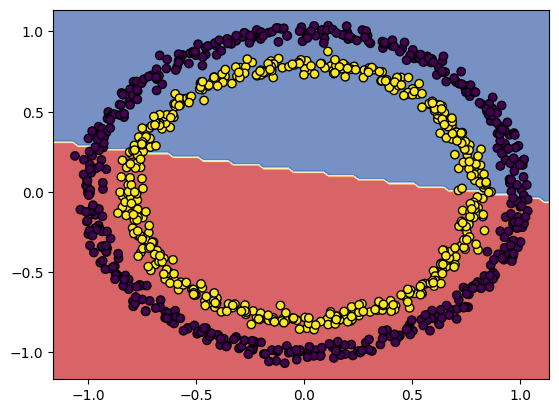

In [ ]:
# check model prediciton
plot(model=model2,x=x,y=y)


In [ ]:
model3=tf.keras.models.Sequential([
    tf.keras.layers.Dense(10,activation="relu"),
    tf.keras.layers.Dense(1,activation="relu")
])
model.compile(loss=tf.keras.losses.binary_crossentropy,
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])
history=model.fit(x,y,epochs=50)

Epoch 1/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.4398 - loss: 0.7035
Epoch 2/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4556 - loss: 0.6997
Epoch 3/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4668 - loss: 0.6978
Epoch 4/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4733 - loss: 0.6965
Epoch 5/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4783 - loss: 0.6956
Epoch 6/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4767 - loss: 0.6951
Epoch 7/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4808 - loss: 0.6947
Epoch 8/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4807 - loss: 0.6944
Epoch 9/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4803 - loss: 0.6942
Epoch 10/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4784 - loss: 0.6940
Epoch 11/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4693 - loss: 0.6939
Epoch 12/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4714 - l

Text(0, 0.5, 'loss')

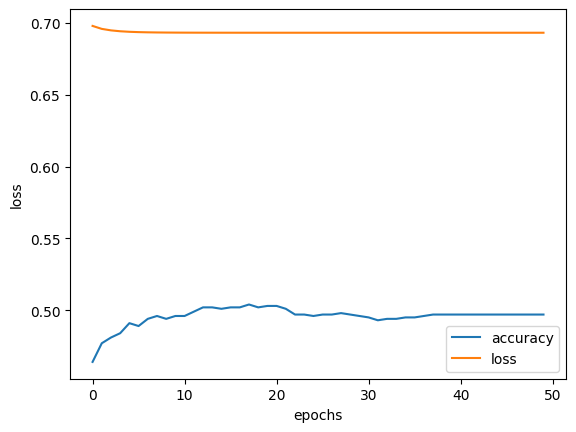

In [ ]:
pd.DataFrame(history.history).plot()
plt.xlabel("epochs")
plt.ylabel("loss")

In [ ]:
model3=tf.keras.models.Sequential([
    tf.keras.layers.Dense(10,activation="relu"),
    tf.keras.layers.Dense(1,activation="sigmoid")
])
model.compile(loss=tf.keras.losses.binary_crossentropy,
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])
history=model.fit(x,y,epochs=50)

Epoch 1/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.5168 - loss: 0.6936
Epoch 2/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5764 - loss: 0.6929
Epoch 3/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5841 - loss: 0.6930
Epoch 4/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5521 - loss: 0.6932
Epoch 5/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5169 - loss: 0.6933
Epoch 6/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4920 - loss: 0.6933
Epoch 7/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4798 - loss: 0.6934
Epoch 8/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4554 - loss: 0.6934
Epoch 9/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4533 - loss: 0.6934
Epoch 10/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4604 - loss: 0.6935
Epoch 11/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4596 - loss: 0.6935
Epoch 12/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4574 - l

In [ ]:
model3=tf.keras.models.Sequential([
    tf.keras.layers.Dense(100,activation="relu"),
    tf.keras.layers.Dense(50,activation="relu"),
    tf.keras.layers.Dense(1,activation="sigmoid")
])
model.compile(loss=tf.keras.losses.binary_crossentropy,
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])
history=model.fit(x,y,epochs=50)

Epoch 1/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - accuracy: 0.5168 - loss: 0.6936
Epoch 2/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5764 - loss: 0.6929
Epoch 3/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5841 - loss: 0.6930
Epoch 4/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5521 - loss: 0.6932
Epoch 5/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5169 - loss: 0.6933
Epoch 6/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4920 - loss: 0.6933
Epoch 7/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4798 - loss: 0.6934
Epoch 8/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4554 - loss: 0.6934
Epoch 9/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4533 - loss: 0.6934
Epoch 10/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4604 - loss: 0.6935
Epoch 11/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4596 - loss: 0.6935
Epoch 12/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4574 - l

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
binary classification


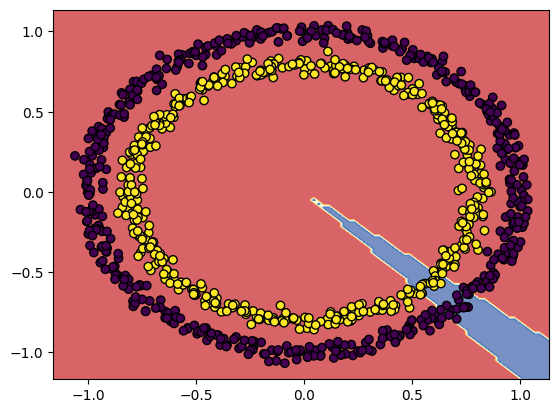

In [ ]:
plot(model=model3,x=x,y=y)

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
from sklearn.preprocessing import StandardScaler
scalar=StandardScaler()
x_train=scalar.fit_transform(x_train)
x_test=scalar.transform(x_test)


In [ ]:
model4=tf.keras.models.Sequential([
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(1,activation="sigmoid")
])
model4.compile(loss=tf.keras.losses.binary_crossentropy,
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
              metrics=["accuracy"])
history=model4.fit(x_train,y_train,epochs=20,validation_split=0.2)

Epoch 1/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 47ms/step - accuracy: 0.5357 - loss: 0.6888 - val_accuracy: 0.5437 - val_loss: 0.6857
Epoch 2/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.4955 - loss: 0.6859 - val_accuracy: 0.5500 - val_loss: 0.6820
Epoch 3/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4980 - loss: 0.6835 - val_accuracy: 0.5562 - val_loss: 0.6773
Epoch 4/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5024 - loss: 0.6789 - val_accuracy: 0.5625 - val_loss: 0.6700
Epoch 5/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5200 - loss: 0.6733 - val_accuracy: 0.5750 - val_loss: 0.6607
Epoch 6/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5325 - loss: 0.6652 - val_accuracy: 0.6187 - val_loss: 0.6464
Epoch 7/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5790 - loss: 0.6457 - val_accuracy: 0.7000 - val_loss: 0.6253
Epoch 8/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7129 - loss: 0.6158 - val_accuracy: 0.6687 - val_loss

In [ ]:
model4.evaluate(x_test,y_test)

7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - accuracy: 0.9733 - loss: 0.2072


[0.21803288161754608, 0.9700000286102295]

Text(0, 0.5, 'loss')

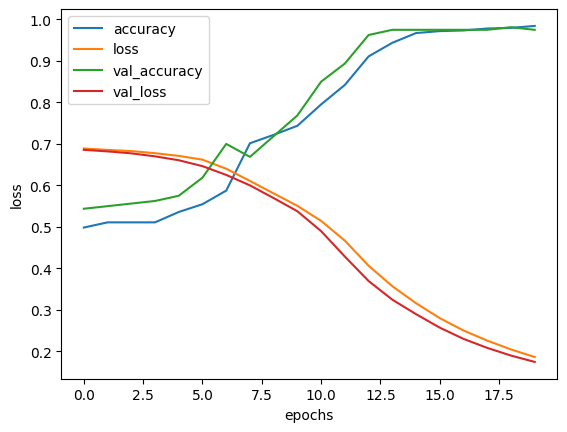

In [ ]:
pd.DataFrame(history.history).plot()
plt.xlabel("epochs")
plt.ylabel("loss")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
binary classification


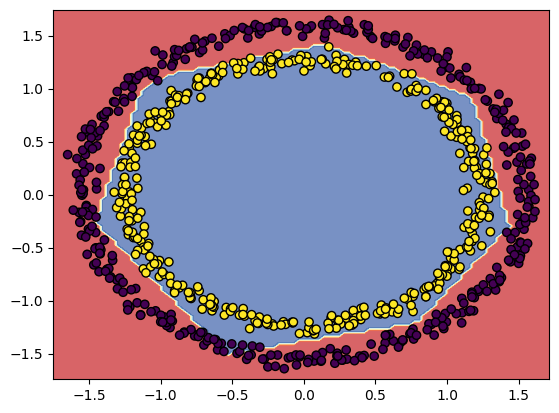

In [ ]:
plot(model=model4,x=x_train,y=y_train)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
binary classification


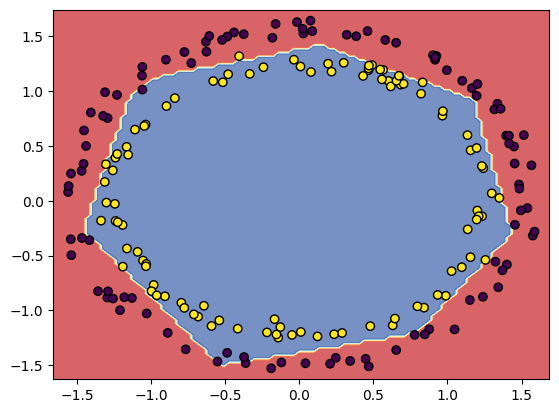

In [ ]:
plot(model=model4,x=x_test,y=y_test)

#finding best learning rate

In [ ]:
import tensorflow as tf
tf.random.set_seed(42)
model5=tf.keras.models.Sequential([
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(1,activation="sigmoid")
])

model5.compile(loss="binary_crossentropy",
              optimizer="Adam",
              metrics=["accuracy"])

lr_schedular=tf.keras.callbacks.LearningRateScheduler(lambda epoch:1e-4*10**(epoch/20))
history=model5.fit(x_train,y_train,epochs=100,
          callbacks=[lr_schedular],
          verbose=0)

In [ ]:
model5.evaluate(x_test,y_test)

7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 61ms/step - accuracy: 0.5093 - loss: 0.8723


[0.8841648101806641, 0.5]

<Axes: >

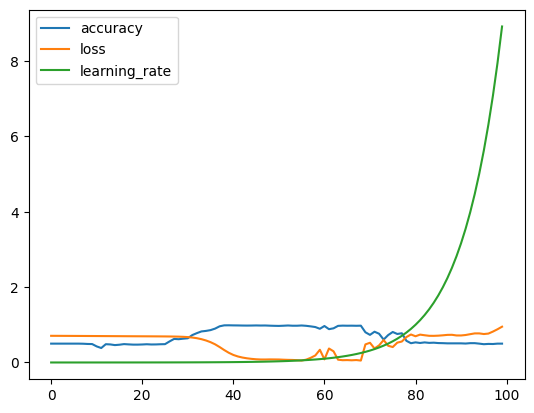

In [ ]:
pd.DataFrame(history.history).plot()

/tmp/ipython-input-780936319.py:6: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


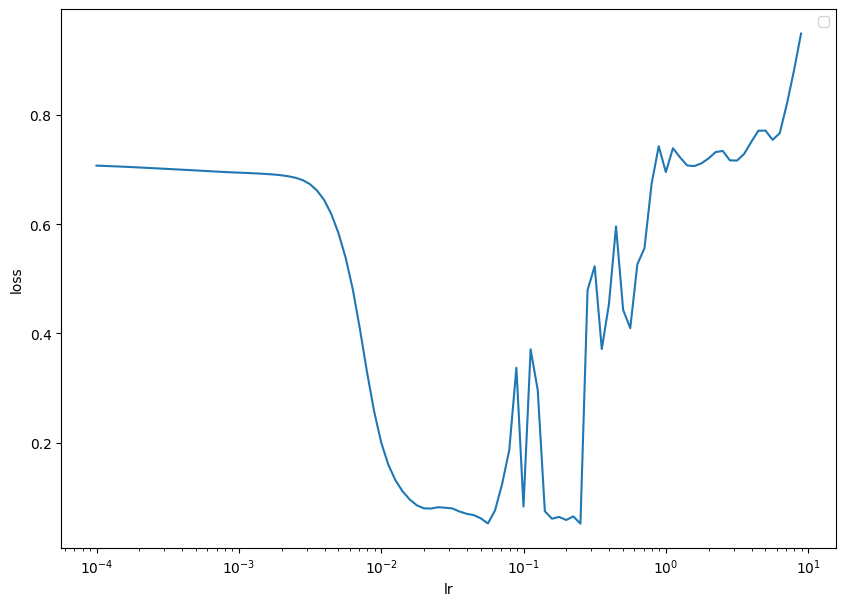

In [ ]:
plt.figure(figsize=(10,7))
lrs=1e-4*(10**(tf.range(100)/20))
plt.semilogx(lrs,history.history["loss"])
plt.xlabel("lr")
plt.ylabel("loss")
plt.legend()

#more evalutiion metrics for classification

In [ ]:
# accuracy(work for balance classes)
#precision(for imbalanace classs and high precesin less false positive)
#recall(high recall leads to less false negative)
#precision recall trade off
#f1score(precision+recall)
#confusion matrix

In [ ]:
tf.random.set_seed(42)

model6=tf.keras.models.Sequential([
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(1,activation="sigmoid")
])

model6.compile(loss="binary_crossentropy",
               optimizer=tf.keras.optimizers.Adam(0.01),
               metrics=["precision"])
history6=model6.fit(x_train,y_train,epochs=20)

Epoch 1/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 0.6955 - precision: 0.5085
Epoch 2/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.6876 - precision: 0.5151
Epoch 3/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.6833 - precision: 0.5268
Epoch 4/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.6799 - precision: 0.5417
Epoch 5/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.6762 - precision: 0.5488
Epoch 6/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.6715 - precision: 0.5538
Epoch 7/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.6655 - precision: 0.5472
Epoch 8/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.6576 - precision: 0.5565
Epoch 9/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.6476 - precision: 0.5691
Epoch 10/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.6360 - precision: 0.5991
Epoch 11/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.6233 - precision: 0.6013
Epoch 12/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.61

#multi class classification


In [2]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [8]:
x_train,x_test=x_train/255.0,x_test/255.0

In [3]:
print(f"trainig sample:\n{x_train[0]}\n")
print(f"trainig label:\n{y_train[0]}\n")

trainig sample:
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1   

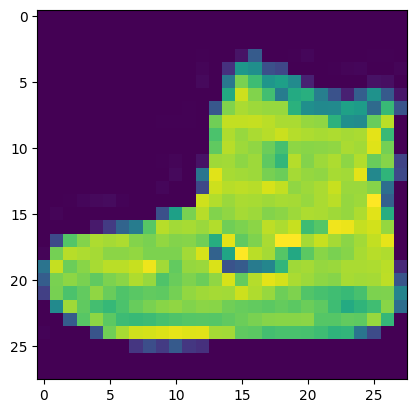

In [4]:
import matplotlib.pyplot as plt
plt.imshow(x_train[0])

In [5]:
# give label to the target
class_name=["T-shirt","Trouser","Pullover","Dress","Coat","Shandal","Shirt","Sneaker","Bag","Ankle boots"]

Text(0.5, 1.0, 'T-shirt')

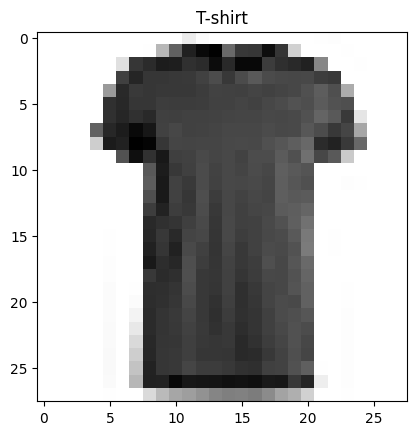

In [6]:
plt.imshow(x_train[17],cmap=plt.cm.binary)
plt.title(class_name[y_train[17]])

In [9]:
import tensorflow as tf

tf.random.set_seed(42)
model6=tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(10,activation="softmax")
])

model6.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                optimizer="Adam",
                metrics=["accuracy"])
non_norm_history=model6.fit(x_train,y_train,epochs=10,validation_data=(x_test,y_test))


/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.3989 - loss: 1.6149 - val_accuracy: 0.7025 - val_loss: 0.8491
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7278 - loss: 0.7874 - val_accuracy: 0.7433 - val_loss: 0.7299
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.7544 - loss: 0.6963 - val_accuracy: 0.7575 - val_loss: 0.6782
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7711 - loss: 0.6490 - val_accuracy: 0.7687 - val_loss: 0.6494
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7840 - loss: 0.6182 - val_accuracy: 0.7829 - val_loss: 0.6274
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7961 - loss: 0.5971 - val_accuracy: 0.7908 - val_loss: 0.6149
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8018 - loss: 0.5831 - val_accuracy: 0.7930 - val_loss: 0.6063
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8044 - loss: 0.5736 - 

In [1]:
# if label are in one hot use catagoricalentropy else SparseCatagoricalCrossentropty

#getting weughts and label per layer

In [18]:
w,b=model6.layers[1].get_weights()
print(b)

[ 0.8148557   0.28293607  1.5686896  -0.67232877]


In [19]:
print(w)

[[-0.22964649  0.3130706  -0.27967843 -0.17041698]
 [ 0.00521728 -0.4030501   0.20312215  0.071907  ]
 [ 0.52934057 -0.7908821  -0.27338022  0.16539986]
 ...
 [-0.09468353  0.00784051 -0.10649401  0.5419549 ]
 [-0.68515456  0.2520376   0.00751978  1.1285849 ]
 [ 0.01658643  0.13616835 -0.31481093  0.3202509 ]]


In [20]:
w.shape

(784, 4)

In [21]:
28*28

784

In [ ]:
# same as imput shape (weights)

In [24]:
w2,b2=model6.layers[2].get_weights()

In [25]:
w2.shape

(4, 4)

#plot model

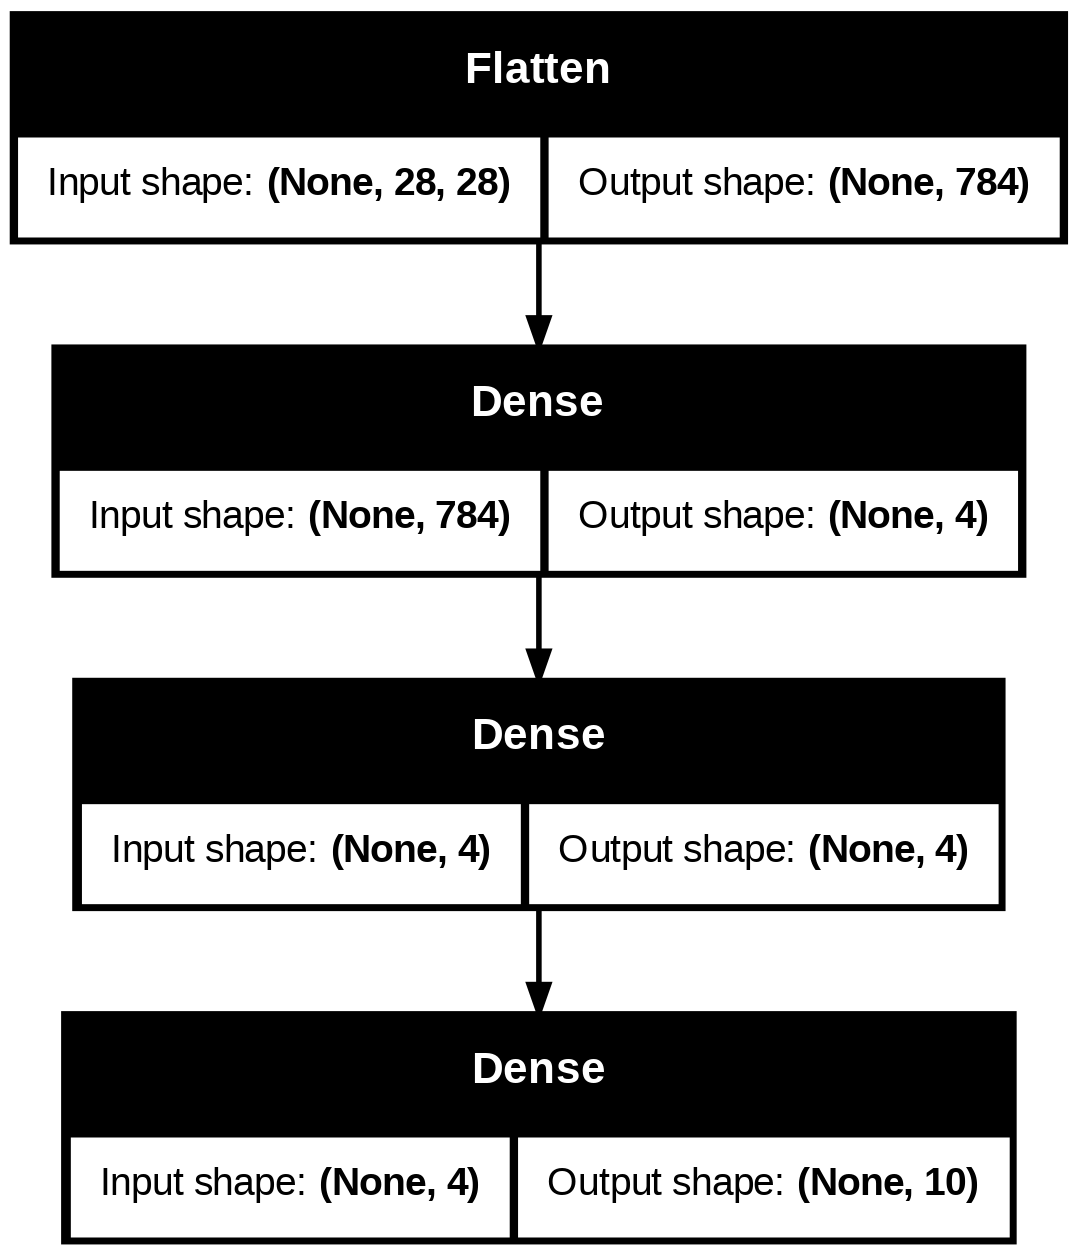

In [27]:
from tensorflow.keras.utils import plot_model
plot_model(model6,show_shapes=True)